# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
#Reading both csv files of training data.
train_identity = pd.read_csv('C:/Users/mangl/OneDrive/Desktop/DataScience/IEEEFraudDetection/train_identity.csv')
train_trans = pd.read_csv('C:/Users/mangl/OneDrive/Desktop/DataScience/IEEEFraudDetection/train_transaction.csv')
#Copying just relevant data to new data frames
tIde = train_identity[['TransactionID','DeviceType','DeviceInfo']].copy()
trainTrans = train_trans[['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']].copy()
#Merging the relevant data frames into one on basis of Transaction Id.
train_data = pd.merge(trainTrans,tIde,how="left",on="TransactionID")
train_data.dropna()
#Droping null values if any


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo


## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [2]:
#Segregating data on the basis of fraud transactions and non fraud transactions.
non_fraud_data = train_data[train_data['isFraud']==0]
fraud_data = train_data[train_data['isFraud']==1]
non_fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M


<Figure size 360x216 with 0 Axes>

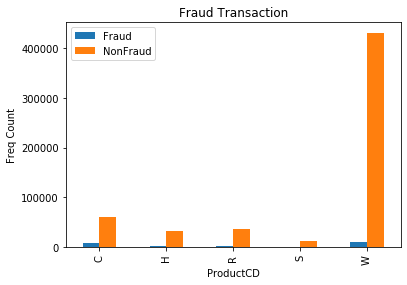

In [3]:
#Q1 Fraud vs ProductCD
# Checking relation between type of product and fraud transactions. Sum of transactions are taken into account.
plt.figure(figsize=(5,3))
pd.concat({
    'Fraud': fraud_data['ProductCD'].value_counts(), 'NonFraud': non_fraud_data['ProductCD'].value_counts()
}, axis=1, sort=True).plot.bar()
plt.title('Fraud Transaction')
plt.xlabel("ProductCD")
plt.ylabel("Freq Count")
plt.subplots_adjust(bottom=0.1, wspace=1)
plt.show()

#We came to know that most of the fraud transactions related to W product.

<Figure size 360x216 with 0 Axes>

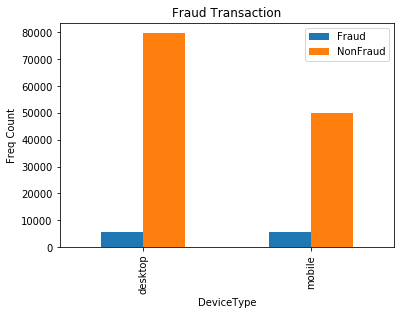

In [4]:
#Q1 Fraud vs DeviceType
# Checking relation between device type and fraud transactions. Sum of transactions are taken into account.
plt.figure(figsize=(5,3))
pd.concat({
    'Fraud': fraud_data['DeviceType'].value_counts(), 'NonFraud': non_fraud_data['DeviceType'].value_counts()
}, axis=1, sort=True).plot.bar()
plt.title('Fraud Transaction')
plt.xlabel("DeviceType")
plt.ylabel("Freq Count")
plt.subplots_adjust(bottom=0.1, wspace=1)
plt.show()
##We came to know that most of the transactions done with Desktop device.

<Figure size 360x216 with 0 Axes>

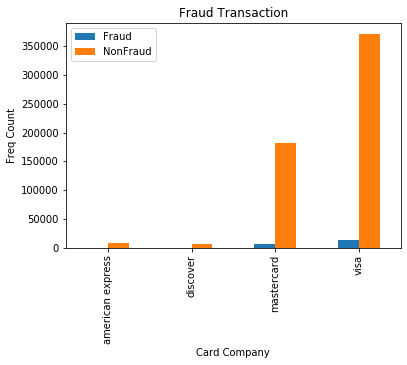

In [5]:
#Q1 Fraud vs Card company
# Checking relation between type of card and fraud transactions. Sum of transactions are taken into account.

plt.figure(figsize=(5,3))
pd.concat({
    'Fraud': fraud_data['card4'].value_counts(), 'NonFraud': non_fraud_data['card4'].value_counts()
}, axis=1, sort=True).plot.bar()
plt.title('Fraud Transaction')
plt.xlabel("Card Company")
plt.ylabel("Freq Count")
plt.subplots_adjust(bottom=0.1, wspace=1)
plt.show()

We came to know that most of the transactions related to W product. Product C and W have maximum number of fraud transactions.
We came to know that most of the fraud transactions done with Desktop device. 
Most of the transactions are done via visa and mastercard. And visa constitue for maximum number of fraud transactions.

## Part 2 - Transaction Frequency

In [6]:
# TODO: code to generate the frequency graph
#Question 2 
#Data cleaning
trainTrans2 = train_data[['TransactionDT','addr2','TransactionAmt']].copy()
train_data['TransactionDT'].max()
trainTrans2['TimeDays'] = train_data['TransactionDT'].div(3600)  #Converting numbers into number of the hours
trainTrans2['TimeHours'] = trainTrans2['TimeDays'].mod(24)        #Converting number of hours
trainTrans2['HourBins'] = pd.cut(x=trainTrans2['TimeHours'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
#Converting time of day into bins of each hour.
trainTrans2.round(3)
trainTrans2['addr2'].value_counts().head(3)      #gives top 3 countries i.e. 87, 60, 96

87.0    520481
60.0      3084
96.0       638
Name: addr2, dtype: int64

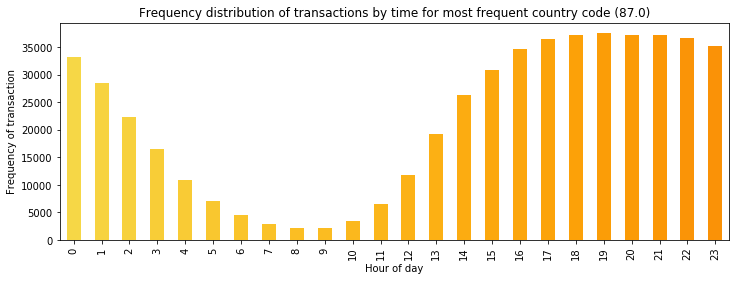

In [7]:
#Plotting for most frequent country code 
from matplotlib import cm              #Importing color
color = cm.inferno_r(np.linspace(.1,.4, 50))

trainTransFirst = trainTrans2[trainTrans2['addr2']==87.0]
plt.figure(figsize=(5,3))
trainTransFirst.groupby(['HourBins']).size().plot(kind='bar', color=color, figsize=(12,4))    ## Plotting frequency of transaction with hour of day
plt.title('Frequency distribution of transactions by time for most frequent country code (87.0)')
plt.ylabel("Frequency of transaction")
plt.xlabel("Hour of day")
plt.show()

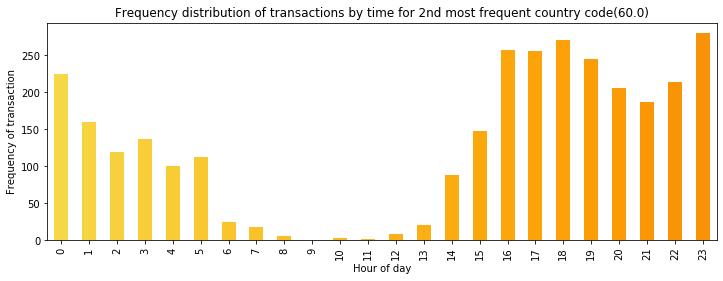

In [8]:
#Plotting for 2nd most frequent country code
trainTransSecond = trainTrans2[trainTrans2['addr2']==60.0]
plt.figure(figsize=(5,3))
trainTransSecond.groupby(['HourBins']).size().plot(kind='bar', color=color, figsize=(12,4))       ## Plotting frequency of transaction with hour of day
plt.title('Frequency distribution of transactions by time for 2nd most frequent country code(60.0)')
plt.ylabel("Frequency of transaction")
plt.xlabel("Hour of day")
plt.show()

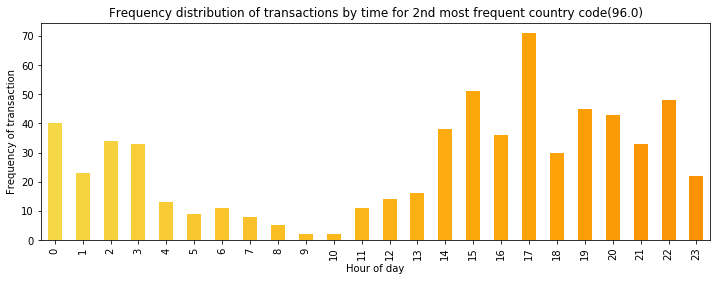

In [9]:
#Plotting for 3rd most frequent country code
trainTransThird = trainTrans2[trainTrans2['addr2']==96.0]
plt.figure(figsize=(5,3))
trainTransThird.groupby(['HourBins']).size().plot(kind='bar', color=color, figsize=(12,4))      ## Plotting frequency of transaction with hour of day
plt.title('Frequency distribution of transactions by time for 2nd most frequent country code(96.0)')
plt.ylabel("Frequency of transaction")
plt.xlabel("Hour of day")
plt.show()

The country with countrycode 87 has transactions were more between 1400 to 0200 hrs. We can infer that there were waking hours for country 87. 
Whereas for countrycode 60, most of the transactions were happenning between 1600 to 0000 hrs. We can infer that these were the waking hours of country with country code 60. 
For country with country code 96, most transactions were happening between 1400 to 0300 hrs. These shows us that people of country 96 were more active in these hours, thus awake.

## Part 3 - Product Code

In [10]:
# TODO: code to analyze prices for different product codes
#Question 3 Taking mean of product will give me average cost of the product.
train_data.groupby(["ProductCD"]).mean().sort_values("TransactionAmt", ascending=False)
#Product R is the most expensive and product C is the cheapest.


,TransactionID,isFraud,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
ProductCD,,,,,,,,
R,3.203595e+06,0.037826,5.286173e+06,168.306188,293.428219,87.100401,NaN,288.419080
W,3.298188e+06,0.020399,7.790774e+06,153.158554,289.561303,86.995469,118.50218,NaN
H,3.163060e+06,0.047662,4.270543e+06,73.170058,294.645902,86.615726,NaN,257.541620
S,3.298124e+06,0.058996,7.889303e+06,60.269487,311.721166,87.007093,NaN,198.746021
C,3.278178e+06,0.116873,7.242143e+06,42.872353,304.045882,59.397647,NaN,224.828765


Sorting the product with their mean value of transaction can help us to estimate the price of product. This gave us that Product R is the most expensive with mean value 168.3 and product C is the cheapest with mean value (42.87)

## Part 4 - Correlation Coefficient

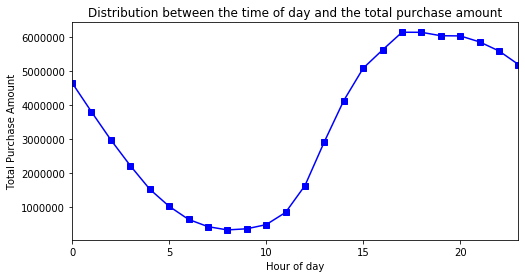

In [11]:
#Q4 Plotting distribution between the time of day and total purchase Amount
plt.figure(figsize=(5,3))
trainTrans2.groupby(['HourBins'])['TransactionAmt'].sum().plot(kind='line', figsize=(8,4), color='blue', marker='s')
plt.title('Distribution between the time of day and the total purchase amount')
plt.ylabel("Total Purchase Amount")
plt.xlabel("Hour of day")
plt.show()

In [12]:
#Q4 Pearson correlation coeff
purchase_Time = trainTrans2.groupby(['HourBins'])['TransactionAmt'].sum()
purchase_time_df = pd.DataFrame(purchase_Time)
purchase_time_df['HourBins']=purchase_time_df.index.astype('int64')
#Getting Pearson correlation
purchase_time_df['HourBins'].corr(purchase_time_df['TransactionAmt'],method='pearson')

0.6420966890612191

In [13]:
#Q4 Spearman correlation coeff
purchase_time_df['HourBins'].corr(purchase_time_df['TransactionAmt'],method='spearman')

0.6304347826086956

As both pearson correlation coeff (0.64) and spearman correlation coeff (0.63) are almost same. We can infer that as time increases, the total transaction purchase amount increases. Thus, more total sum of transaction in 1700 to 0000 hrs.

## Part 5 - Interesting Plot

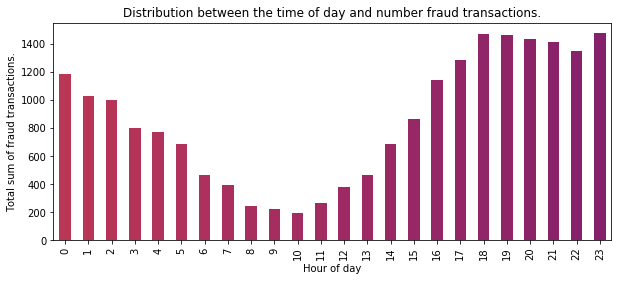

In [14]:
color_new = cm.inferno_r(np.linspace(0.5, 0.7, 35))
#Question 5
f_data2 = fraud_data[['TransactionDT','TransactionAmt']].copy()
f_data2['TimeDays'] = fraud_data['TransactionDT'].div(3600)  #Converting numbers into number of the day
f_data2['TimeHours'] = f_data2['TimeDays'].mod(24)        #Converting numbers into number of the hours
f_data2['HourBins'] = pd.cut(x=f_data2['TimeHours'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
f_data2.round(3)

#Plotting time of day and number of fraud transactions.
plt.figure(figsize=(5,3))
f_data2.groupby(['HourBins'])['TransactionAmt'].size().plot(kind='bar', figsize=(10,4), color=color_new)
plt.title('Distribution between the time of day and number fraud transactions.')
plt.ylabel("Total sum of fraud transactions.")
plt.xlabel("Hour of day")
plt.show()

It is interesting that more number of fraud transactions were happening between 1700 to 2300 hrs. These can give us insight as to which is the most vulnerable time.

## Part 6 - Prediction Model

In [15]:
#Cleaning training data for prediction
train_obj_df = train_data.select_dtypes(include=['object']).copy()
#Replacing null values with max number of values
train_obj_df[train_obj_df.isnull().any(axis=1)]
train_data.isnull().sum()
train_obj_df = train_data.fillna({"DeviceType": "desktop", "P_emaildomain": "gmail.com", "R_emaildomain": "gmail.com", "DeviceInfo": "Windows", "card4": "visa", "card6": "credit", "addr1": "299.0", "addr2" : "87.0", })

In [16]:
train_obj_df["Windows"] = np.where(train_obj_df["DeviceInfo"]=="Windows", 1, 0)
train_obj_df["P_gmail"] = np.where(train_obj_df["P_emaildomain"]=="gmail.com", 1, 0)
train_obj_df["R_gmail"] = np.where(train_obj_df["R_emaildomain"]=="gmail.com", 1, 0)
train_obj_df
# Cleaning data. These column contains a lot categorical data with more that half of values same. So I divided data 
#DeviceInfo to device_windows to check if it is windows or not. Same with P_email and R_email as most of their values are gmail.

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo,Windows,P_gmail,R_gmail
0,2987000,0,86400,68.500,W,discover,credit,gmail.com,gmail.com,315,87,19.0,NaN,desktop,Windows,1,1,1
1,2987001,0,86401,29.000,W,mastercard,credit,gmail.com,gmail.com,325,87,NaN,NaN,desktop,Windows,1,1,1
2,2987002,0,86469,59.000,W,visa,debit,outlook.com,gmail.com,330,87,287.0,NaN,desktop,Windows,1,0,1
3,2987003,0,86499,50.000,W,mastercard,debit,yahoo.com,gmail.com,476,87,NaN,NaN,desktop,Windows,1,0,1
4,2987004,0,86506,50.000,H,mastercard,credit,gmail.com,gmail.com,420,87,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M,0,1,1
5,2987005,0,86510,49.000,W,visa,debit,gmail.com,gmail.com,272,87,36.0,NaN,desktop,Windows,1,1,1
6,2987006,0,86522,159.000,W,visa,debit,yahoo.com,gmail.com,126,87,0.0,NaN,desktop,Windows,1,0,1
7,2987007,0,86529,422.500,W,visa,debit,mail.com,gmail.com,325,87,NaN,NaN,desktop,Windows,1,0,1
8,2987008,0,86535,15.000,H,visa,debit,anonymous.com,gmail.com,337,87,NaN,NaN,mobile,iOS Device,0,0,1
9,2987009,0,86536,117.000,W,mastercard,debit,yahoo.com,gmail.com,204,87,19.0,NaN,desktop,Windows,1,0,1


In [17]:
#Getting hot vectors of categorical data where number of categories are small.
train_obj_df = pd.DataFrame(pd.concat([train_obj_df,pd.get_dummies(train_obj_df, columns=["DeviceType", "card4", "card6", "ProductCD"], prefix=["device", "card_company", "card_type", "prod"])],axis=1))
train_obj_df = train_obj_df.loc[:,~train_obj_df.columns.duplicated()]
train_data_df = train_obj_df[['isFraud','TransactionDT','TransactionAmt','addr1','addr2','Windows','P_gmail','R_gmail','device_desktop','device_mobile','card_company_american express','card_company_discover','card_company_mastercard','card_company_visa','card_type_charge card','card_type_credit','card_type_debit','prod_C','prod_H','prod_R','prod_S','prod_W']].copy()

In [18]:
from sklearn.model_selection import train_test_split
#Splitting data to input and output
train_fraud = np.array(train_data_df['isFraud'])
train_data_df= train_data_df.drop('isFraud', axis = 1)
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
#Splitting train data in two parts. First to train and second one to predict.
X_train, X_test, y_train, y_test = train_test_split(train_data_df, train_fraud, test_size=0.3)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)    #Checking roc_auc score for checking validity of model  
#roc_auc score is 0.89

0.8838014371580922

In [22]:
#Taking and cleaning Test Data in same way the train data is done
test_identity = pd.read_csv('C:/Users/mangl/OneDrive/Desktop/DataScience/IEEEFraudDetection/test_identity.csv')
test_trans = pd.read_csv('C:/Users/mangl/OneDrive/Desktop/DataScience/IEEEFraudDetection/test_transaction.csv')
test1 = test_identity[['TransactionID','DeviceType','DeviceInfo']].copy()
test2 = test_trans[['TransactionID','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']].copy()
test_data = pd.merge(test2,test1,how="left",on="TransactionID")
test_obj_df = test_data.select_dtypes(include=['object']).copy()
#Replacing null values with max number of values
test_obj_df[test_obj_df.isnull().any(axis=1)]
test_obj_df = test_data.fillna({"DeviceType": "desktop", "P_emaildomain": "gmail.com", "R_emaildomain": "gmail.com", "DeviceInfo": "Windows", "card4": "visa", "card6": "credit", "addr1": "299.0", "addr2" : "87.0", })
test_obj_df[test_obj_df.isnull().any(axis=1)]
#These column contains a lot categorical data with more that half values being same.
test_obj_df["Windows"] = np.where(test_obj_df["DeviceInfo"]=="Windows", 1, 0)
test_obj_df["P_gmail"] = np.where(test_obj_df["P_emaildomain"]=="gmail.com", 1, 0)
test_obj_df["R_gmail"] = np.where(test_obj_df["R_emaildomain"]=="gmail.com", 1, 0)
#Getting hot vectors of categorical data left
test_obj_df = pd.DataFrame(pd.concat([test_obj_df,pd.get_dummies(test_obj_df, columns=["DeviceType", "card4", "card6", "ProductCD"], prefix=["device", "card_company", "card_type", "prod"])],axis=1))
#Removing duplicate columns
test_obj_df = test_obj_df.loc[:,~test_obj_df.columns.duplicated()]
test_trans_id = test_obj_df[['TransactionID']].copy()
test_obj_df.drop(['TransactionID', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'dist1', 'dist2'], axis=1,inplace=True)
test_obj_df.shape

(506691, 21)

In [24]:
rf.fit(train_data_df, train_fraud); #Modelling with all the train data

In [25]:
predict_test = rf.predict(test_obj_df)  #Predicting test data with our model.

In [26]:
result = test_trans_id[['TransactionID']].copy()
result['isFraud'] = predict_test
result.to_csv('C:/Users/mangl/OneDrive/Desktop/DataScience/IEEEFraudDetection/result.csv')
#Saving our data into csv for Kaggle

Data cleaning is very important to use any data model efficiently. Hot Vectors is used to clean some data. Null values are replaced with max occured values.I used Random Forest generator to train the test data. After modelling roc_auc score is calculated to check the precision of the model.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/nmangla23

Highest Rank: 5299

Score: 0.7565

Number of entries: 3

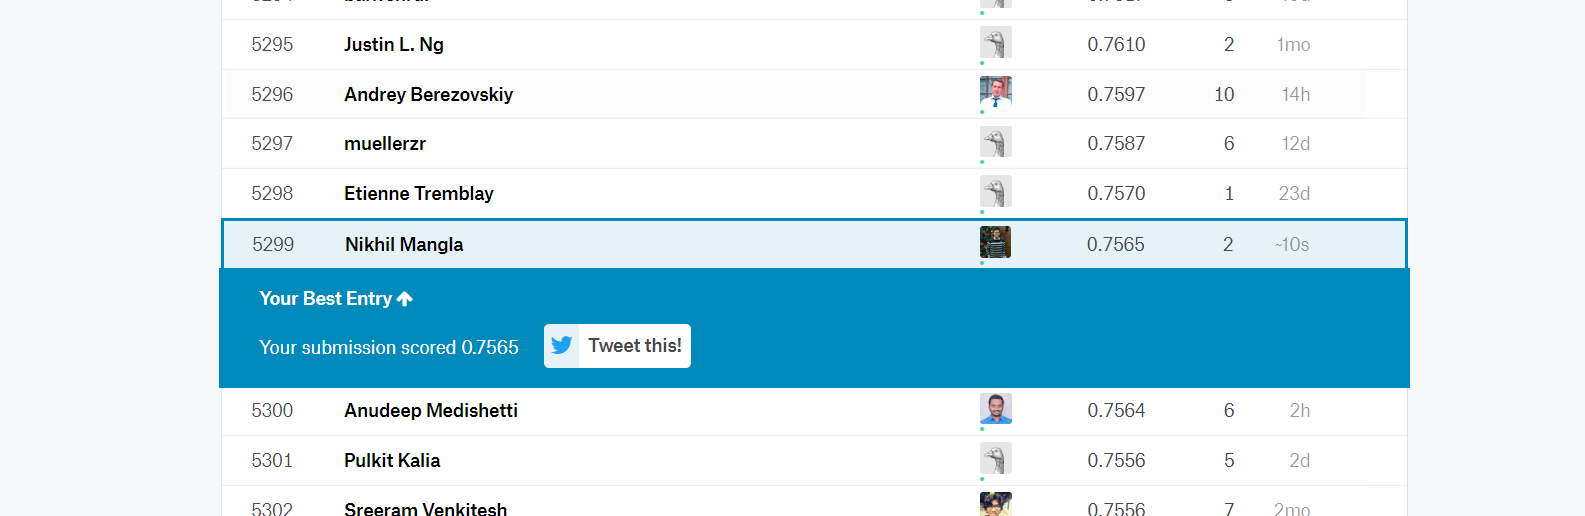

References:
https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
https://pbpython.com/categorical-encoding.html